# **Imports**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
sns.set_style(style='darkgrid')

# **Load Data from Drive**

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/amazon'
data_path = '/content/drive/MyDrive/Colab Notebooks/amazon/FshionProductReviews_V2.csv'

In [ ]:
data = pd.read_csv(data_path)

In [ ]:
data.head()

,overall,verified,reviewTime,reviewText,summary
0,2,True,"09 28, 2014","I agree with the other review, the opening is ...","I agree with the other review, the opening is ..."
1,4,False,"08 25, 2014",Love these... I am going to order another pack...,My New 'Friends' !!
2,2,True,"08 24, 2014",too tiny an opening,Two Stars
3,4,True,"05 31, 2014",These little plastic backs work great. No mor...,Works great!
4,3,True,"09 22, 2013",mother - in - law wanted it as a present for h...,bought as a present


# Exploratory Data Analysis

In [ ]:
data[['verified']].value_counts()

verified
True        718211
False        50071
dtype: int64

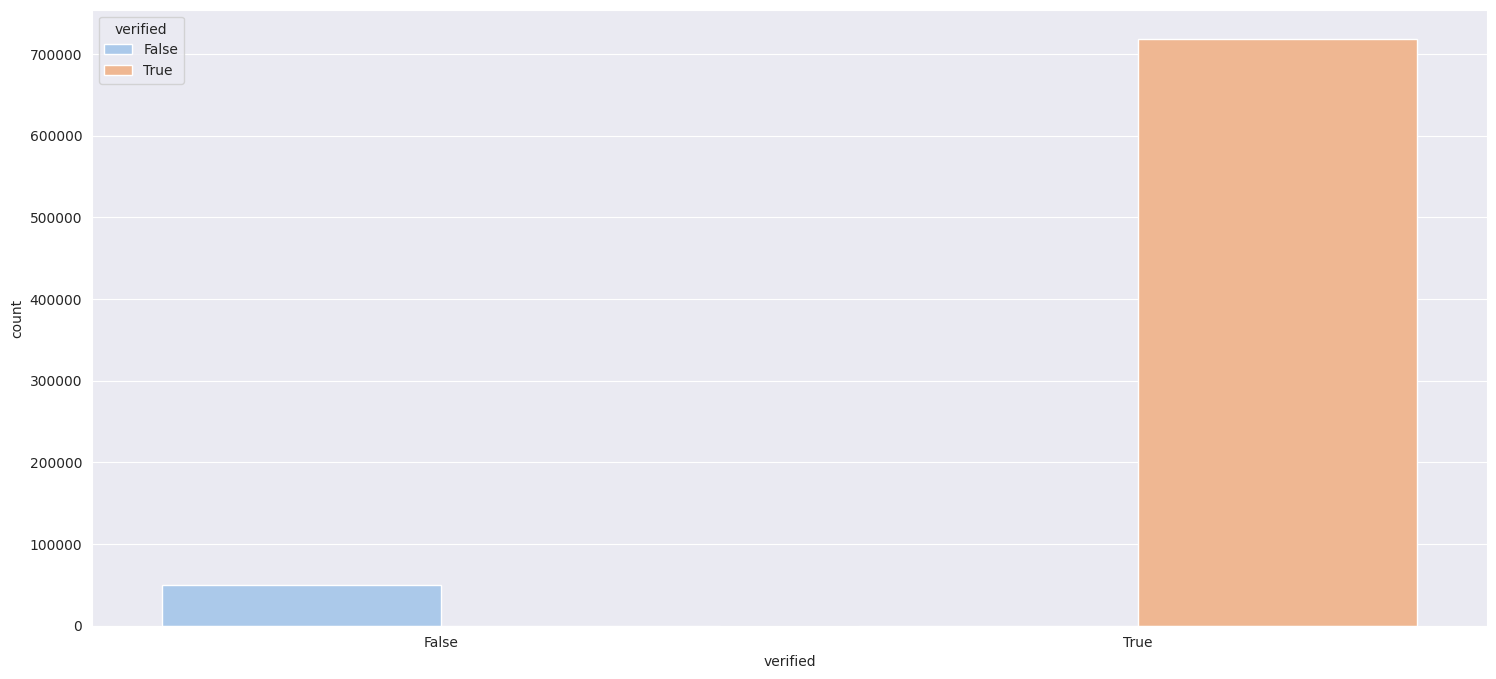

In [ ]:

fig, ax = plt.subplots(figsize=(18, 8))
sns.countplot(
    data=data, 
    x='verified', 
    hue='verified', 
    palette='pastel'
)
plt.show()

In [ ]:
data['overall'].value_counts()

5    387548
4    132277
1     98841
3     89371
2     60245
Name: overall, dtype: int64

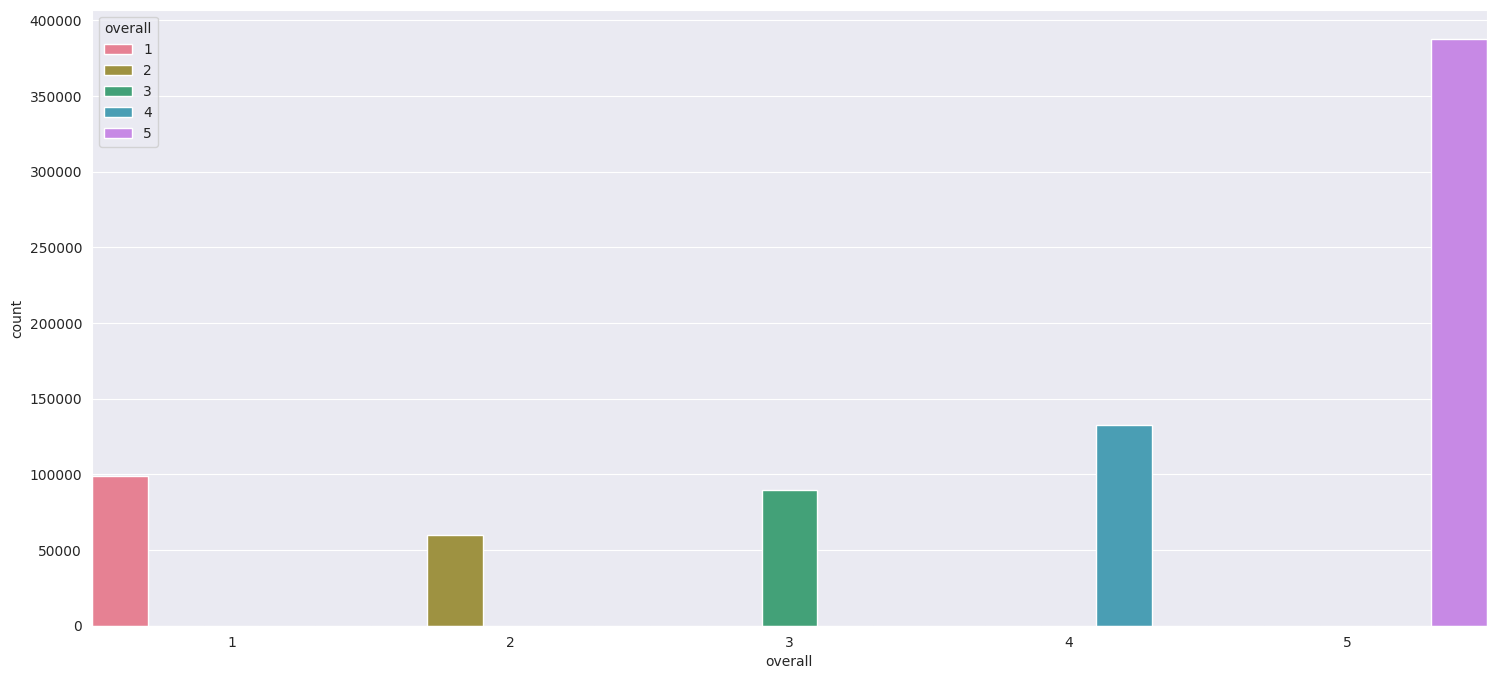

In [ ]:
# review rating distribution
fig, ax = plt.subplots(figsize=(18, 8))
sns.countplot(
    data=data, 
    x='overall', 
    hue='overall', 
    width=1, 
    palette='husl'
  )
plt.show()

In [ ]:

data.reviewText

0         I agree with the other review, the opening is ...
1         Love these... I am going to order another pack...
2                                       too tiny an opening
3         These little plastic backs work great.  No mor...
4         mother - in - law wanted it as a present for h...
                                ...                        
768277    I absolutely love this dress!!  It's sexy and ...
768278    I'm 5'6 175lbs. I'm on the tall side. I wear a...
768279                           Too big in the chest area!
768280                  Too clear in the back, needs lining
768281    Ordered and was slightly small. Worked with th...
Name: reviewText, Length: 768282, dtype: object

In [ ]:
data[['reviewText']].applymap(
    lambda row: len(str(row).split(' '))
    ).describe().T

,count,mean,std,min,25%,50%,75%,max
reviewText,768282.0,31.505848,39.631921,1.0,9.0,20.0,38.0,2088.0


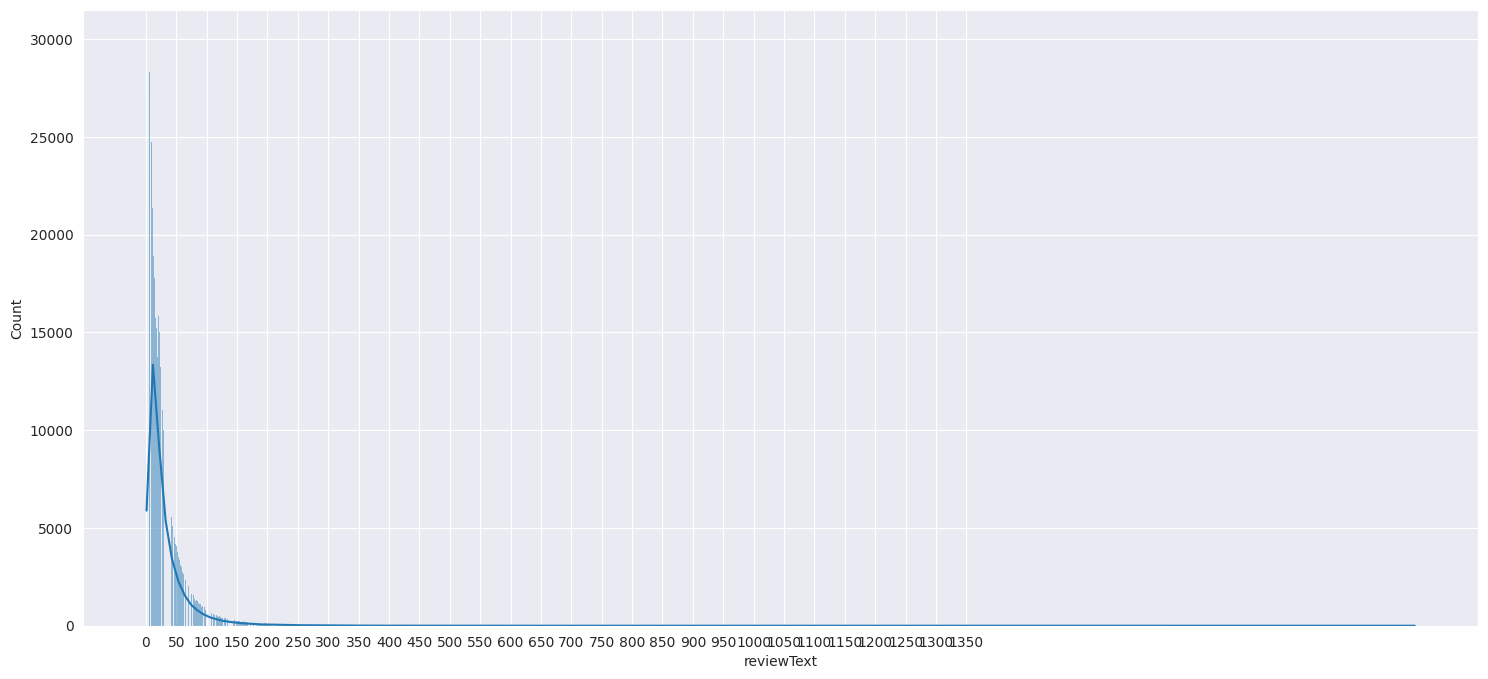

In [ ]:
# Review length distribution
fig, ax = plt.subplots(figsize=(18, 8))
hist = sns.histplot(
    data=data[['reviewText']].applymap(lambda row: len(str(row).split(' '))),
    x='reviewText', 
    bins='auto',
    stat='count',
    kde=True
)
hist.set_xticks(np.arange(0, 1400, 50))
plt.show()

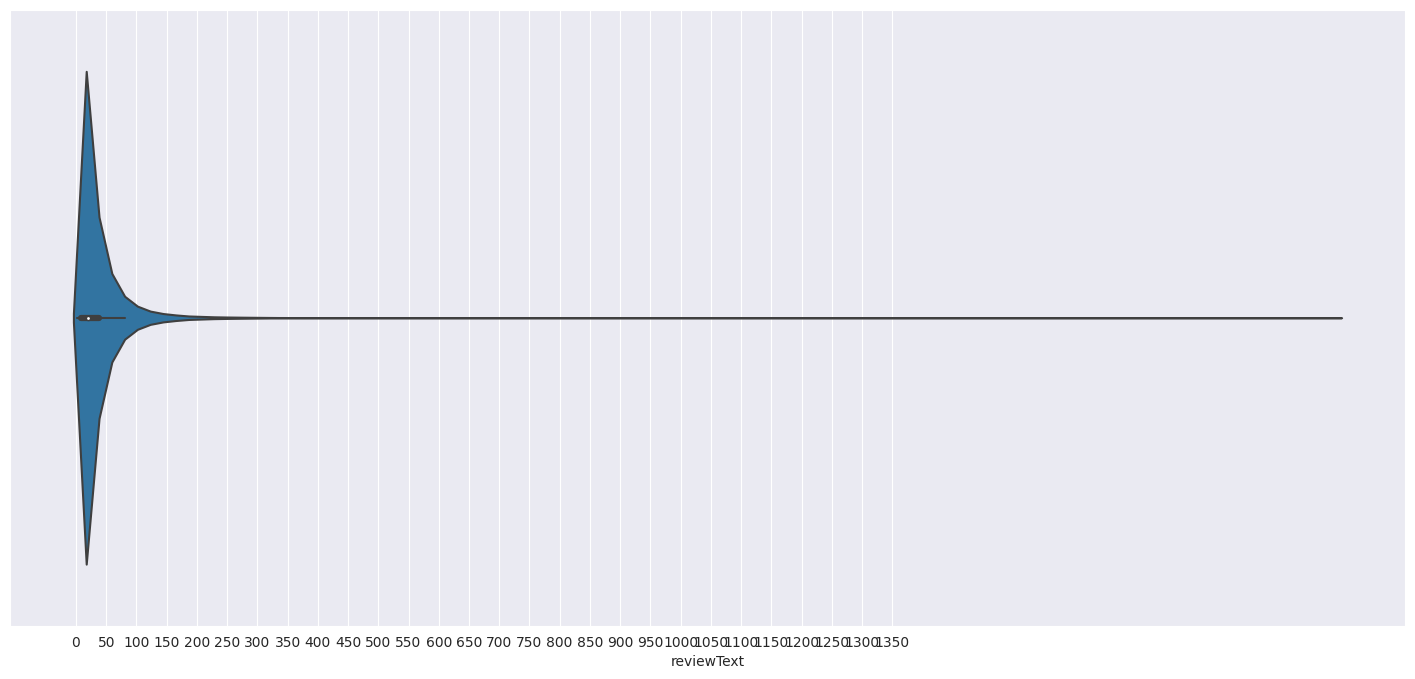

In [ ]:
# Review length range density
fig, ax = plt.subplots(figsize=(18, 8))
violin = sns.violinplot(
    data=data[['reviewText']].applymap(lambda row: len(str(row).split(' '))),
    x='reviewText', 
)
violin.set_xticks(np.arange(0, 1400, 50))
plt.show()

# **Review Sentiment Over The Time**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768282 entries, 0 to 768281
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   overall     768282 non-null  int64 
 1   verified    768282 non-null  bool  
 2   reviewTime  768282 non-null  object
 3   reviewText  768281 non-null  object
 4   summary     768279 non-null  object
dtypes: bool(1), int64(1), object(3)
memory usage: 24.2+ MB


In [ ]:
data.reviewTime

0         09 28, 2014
1         08 25, 2014
2         08 24, 2014
3         05 31, 2014
4         09 22, 2013
             ...     
768277    02 21, 2017
768278    11 25, 2016
768279    11 10, 2016
768280    11 10, 2016
768281     08 9, 2016
Name: reviewTime, Length: 768282, dtype: object

In [ ]:
# Converting reviewTime to datetime
data.reviewTime = pd.to_datetime(data.reviewTime, infer_datetime_format=True)
data.head()

,overall,verified,reviewTime,reviewText,summary
0,2,True,2014-09-28,"I agree with the other review, the opening is ...","I agree with the other review, the opening is ..."
1,4,False,2014-08-25,Love these... I am going to order another pack...,My New 'Friends' !!
2,2,True,2014-08-24,too tiny an opening,Two Stars
3,4,True,2014-05-31,These little plastic backs work great. No mor...,Works great!
4,3,True,2013-09-22,mother - in - law wanted it as a present for h...,bought as a present


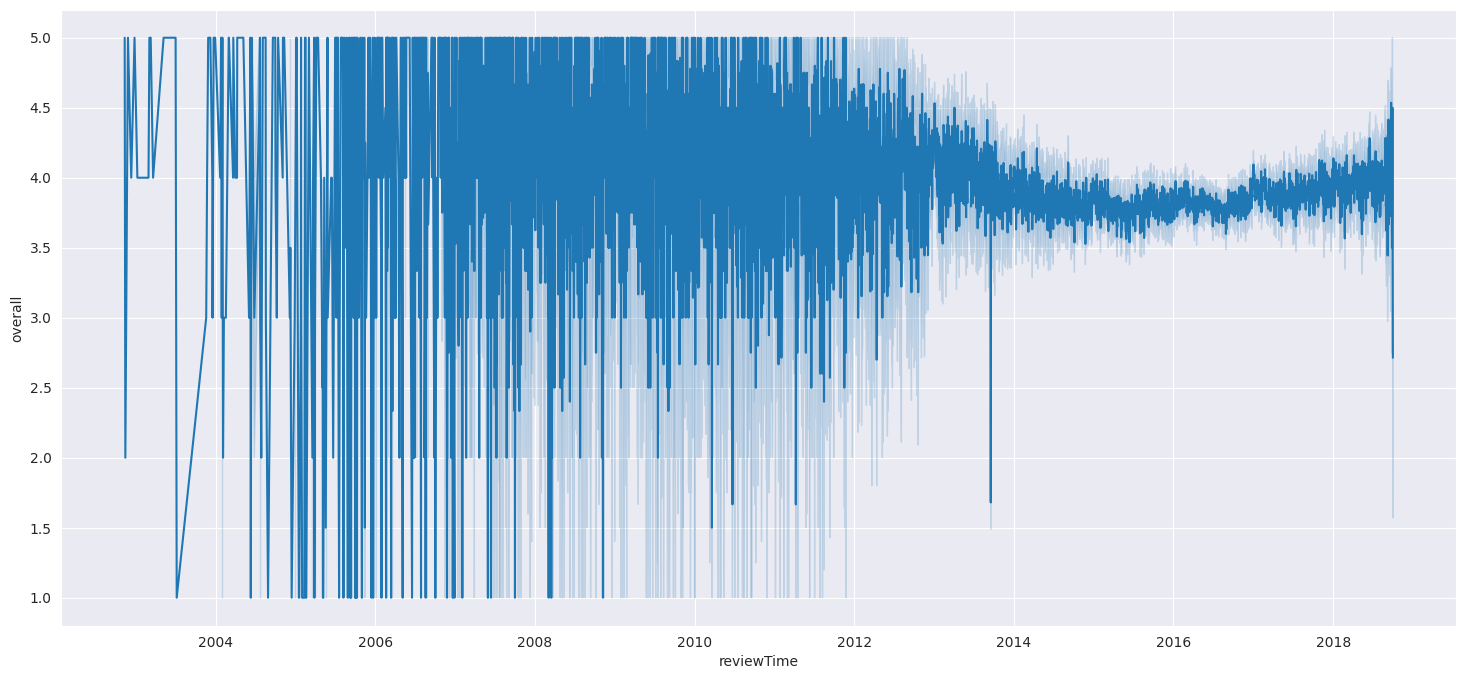

In [ ]:
fig, ax = plt.subplots(figsize=(18, 8))
line = sns.lineplot(
    data=data,
    x='reviewTime', y='overall'
)
plt.show()

#  Drop Unverified reviews

In [ ]:
data = data[data.verified == True]
data

,overall,verified,reviewTime,reviewText,summary
0,2,True,2014-09-28,"I agree with the other review, the opening is ...","I agree with the other review, the opening is ..."
2,2,True,2014-08-24,too tiny an opening,Two Stars
3,4,True,2014-05-31,These little plastic backs work great. No mor...,Works great!
4,3,True,2013-09-22,mother - in - law wanted it as a present for h...,bought as a present
5,3,True,2013-07-17,"Item is of good quality. Looks great, too. But...",Buxton heiress collection
...,...,...,...,...,...
768277,5,True,2017-02-21,I absolutely love this dress!! It's sexy and ...,I absolutely love this dress
768278,5,True,2016-11-25,I'm 5'6 175lbs. I'm on the tall side. I wear a...,I wear a large and ordered a large and it stil...
768279,3,True,2016-11-10,Too big in the chest area!,Three Stars
768280,3,True,2016-11-10,"Too clear in the back, needs lining",Three Stars


In [ ]:
data[['reviewText']].applymap(lambda row: len(str(row).split(' ')))

,reviewText
0,48
2,4
3,28
4,21
5,68
...,...
768277,48
768278,37
768279,6
768280,7


In [ ]:
data['length'] = data[['reviewText']].applymap(lambda row: len(str(row).split(' ')))

In [ ]:
data

,overall,verified,reviewTime,reviewText,summary,length
0,2,True,2014-09-28,"I agree with the other review, the opening is ...","I agree with the other review, the opening is ...",48
2,2,True,2014-08-24,too tiny an opening,Two Stars,4
3,4,True,2014-05-31,These little plastic backs work great. No mor...,Works great!,28
4,3,True,2013-09-22,mother - in - law wanted it as a present for h...,bought as a present,21
5,3,True,2013-07-17,"Item is of good quality. Looks great, too. But...",Buxton heiress collection,68
...,...,...,...,...,...,...
768277,5,True,2017-02-21,I absolutely love this dress!! It's sexy and ...,I absolutely love this dress,48
768278,5,True,2016-11-25,I'm 5'6 175lbs. I'm on the tall side. I wear a...,I wear a large and ordered a large and it stil...,37
768279,3,True,2016-11-10,Too big in the chest area!,Three Stars,6
768280,3,True,2016-11-10,"Too clear in the back, needs lining",Three Stars,7


# **Outlier Treatment**

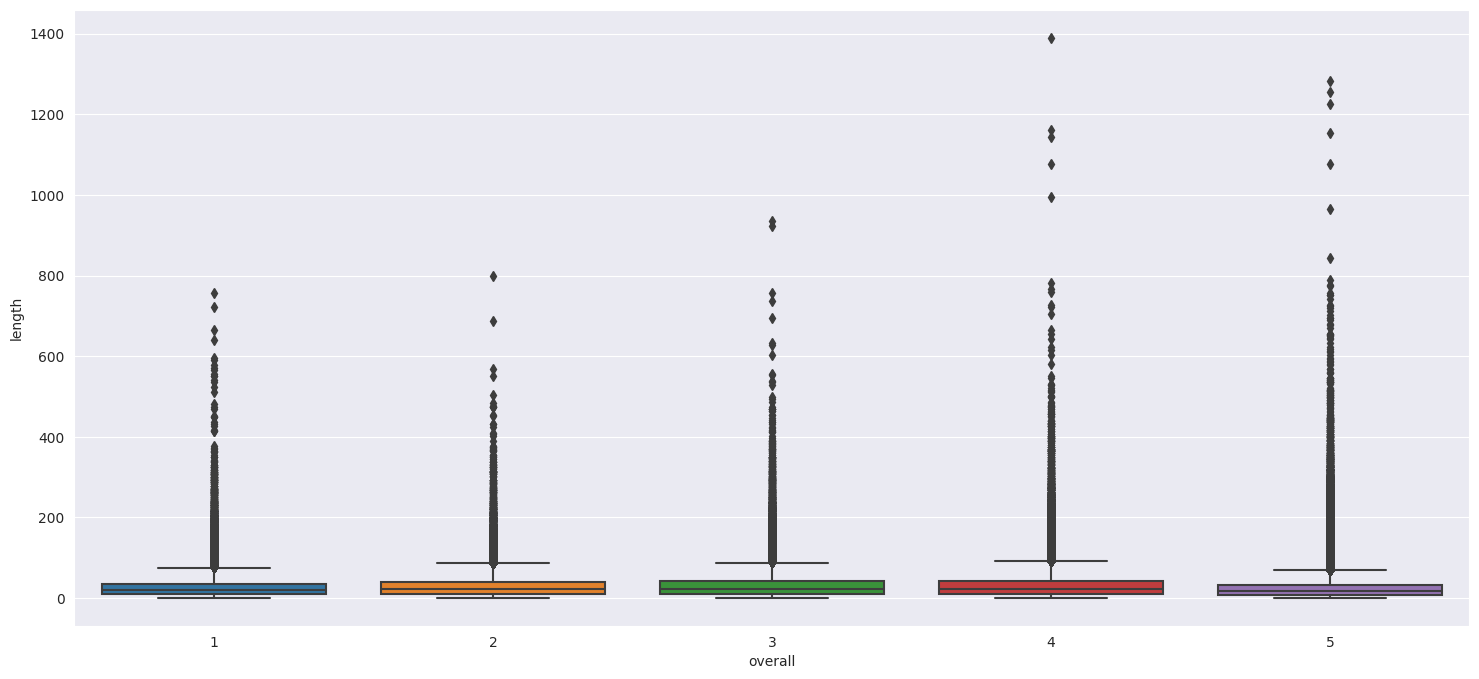

In [ ]:
fig, ax = plt.subplots(figsize=(18, 8))
box = sns.boxplot(
    x='overall', y='length',
    data=data
)
plt.show()

In [ ]:
class OutlierDetector:
    def __init__(self) -> None:
        self.Q1 = None
        self.Q3 = None
        self.IQR = None
    
    def detect_remove(self,df:pd.DataFrame, col: str) -> pd.DataFrame:
        self.Q1 = df[[col]].quantile(0.25).values[0]
        self.Q3 = df[[col]].quantile(0.75).values[0]
        self.IQR = self.Q3 - self.Q1
        return df[~((df[col] > (self.Q3+(1.2*self.IQR))))]

In [ ]:
detector = OutlierDetector()
dataV2 = detector.detect_remove(data, 'length')

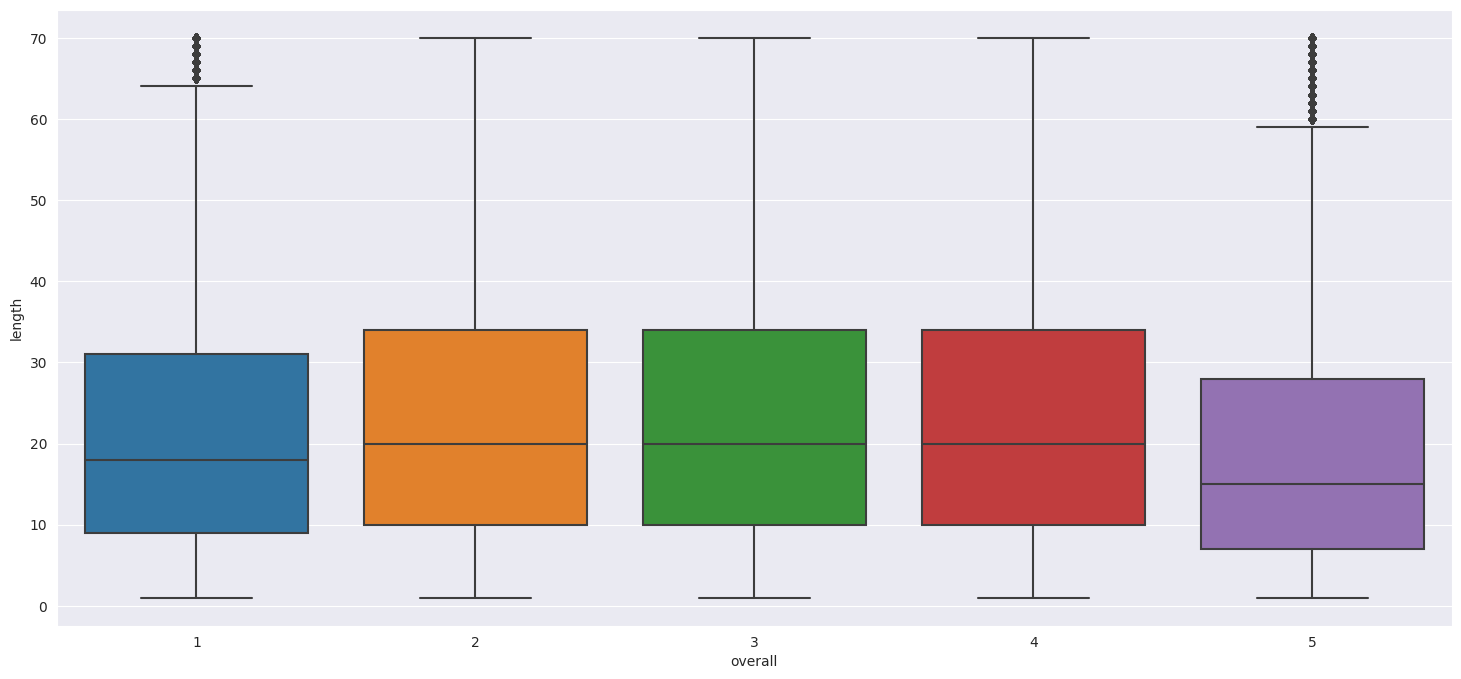

In [ ]:

fig, ax = plt.subplots(figsize=(18, 8))
box = sns.boxplot(
    x='overall', y='length',
    data=dataV2
)
plt.show()

In [ ]:
dataV2

,overall,verified,reviewTime,reviewText,summary,length
0,2,True,2014-09-28,"I agree with the other review, the opening is ...","I agree with the other review, the opening is ...",48
2,2,True,2014-08-24,too tiny an opening,Two Stars,4
3,4,True,2014-05-31,These little plastic backs work great. No mor...,Works great!,28
4,3,True,2013-09-22,mother - in - law wanted it as a present for h...,bought as a present,21
5,3,True,2013-07-17,"Item is of good quality. Looks great, too. But...",Buxton heiress collection,68
...,...,...,...,...,...,...
768277,5,True,2017-02-21,I absolutely love this dress!! It's sexy and ...,I absolutely love this dress,48
768278,5,True,2016-11-25,I'm 5'6 175lbs. I'm on the tall side. I wear a...,I wear a large and ordered a large and it stil...,37
768279,3,True,2016-11-10,Too big in the chest area!,Three Stars,6
768280,3,True,2016-11-10,"Too clear in the back, needs lining",Three Stars,7


# Explore WordCloud

In [ ]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

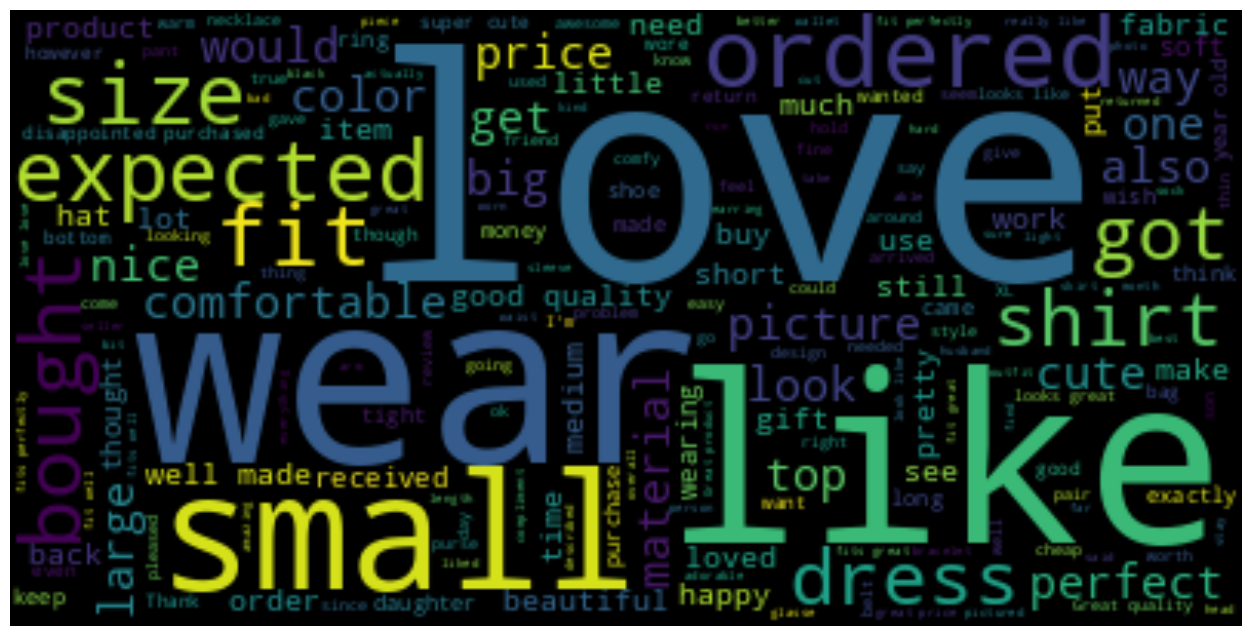

In [ ]:
# Generating Stopwords list
fig, ax = plt.subplots(figsize=(18, 8))
stop_words = set(stopwords.words('english'))
stop_words.update(["br","href"])
textt = " ".join(str(review) for review in dataV2.reviewText)
wordcloud = WordCloud(stopwords=stop_words).generate(textt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('/content/drive/MyDrive/Colab Notebooks/amazon/wordcloud.png', dpi=300)
plt.show()

In [ ]:
dataV2.to_csv(
    '/content/drive/MyDrive/Colab Notebooks/amazon/FshionProductReviews_V3.csv',
    index=False
)